In [1]:
import pandas as pd
import ktest
from ktest.tester import Ktest

# Ktest: two-sample kernel tests for large datasets
## Functionalities demonstrated on real data

Loading data:

In [2]:
data = pd.read_csv('v5_data/RTqPCR_reversion_logcentered.csv', index_col=0)

Constructing metadata and instantiating Ktest:

In [3]:
meta = pd.Series(data = pd.Series(data.index).apply(lambda x : x.split(sep='.')[1]))
meta.index = data.index
kt_1 = Ktest(data=data, metadata=meta, sample_names=['48HREV','48HDIFF'])
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
not computed, run ktest.test.


Performing multivariate test (default setting):

In [4]:
kt_1.test()

- Computing kFDA statistic
- Computing asymptotic p-values


In [5]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
Truncation 1: 124.24605050105527. P-value:
asymptotic: 7.441902076508593e-29, permutation: not computed.
Truncation 2: 175.42690079136315. P-value:
asymptotic: 8.063665510259436e-39, permutation: not computed.
Truncation 3: 180.64582255120052. P-value:
asymptotic: 6.397297338077915e-39, permutation: not computed.
Truncation 4: 224.91994049005277. P-value:
asymptotic: 1.63718649267316e-47, permutation: not computed.
Truncation 5: 514.4935488491165. P-value:
asymptotic: 5.936958016119782e-109, permutation: not computed.


As a result, kFDA statistic with assiciated asymptotic p-values for each truncation were calculated. The latter are stored respectively in attributes `kfdat_statistic` and `kfda_pval_asymp`:

In [6]:
kt_1.kfda_statistic

1       124.246051
2       175.426901
3       180.645823
4       224.919940
5       514.493549
          ...     
335    3582.939656
336    3584.073615
337    3733.642611
338    6198.241945
339    7276.040711
Length: 339, dtype: float64

In [7]:
kt_1.kfda_pval_asymp

1       7.441902e-29
2       8.063666e-39
3       6.397297e-39
4       1.637186e-47
5      5.936958e-109
           ...      
335     0.000000e+00
336     0.000000e+00
337     0.000000e+00
338     0.000000e+00
339     0.000000e+00
Length: 339, dtype: float64

### Options: permutation test and Nystrom approximation

Alongside with asymptotic p-values, permutation-based p-values can be calcultated and stored in `kfda_pval_perm`:

In [8]:
kt_1.test(permutation=True, n_permutations=int(3e3))

- Computing kFDA statistic
- Performing permutations to compute p-values:


100%|███████████████████████████████████████| 3000/3000 [02:50<00:00, 17.62it/s]


In [9]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
not computed, run ktest.test.
kFDA:
Truncation 1: 124.24605050105527. P-value:
asymptotic: 7.441902076508593e-29, permutation: 0.0.
Truncation 2: 175.42690079136315. P-value:
asymptotic: 8.063665510259436e-39, permutation: 0.0.
Truncation 3: 180.64582255120052. P-value:
asymptotic: 6.397297338077915e-39, permutation: 0.0.
Truncation 4: 224.91994049005277. P-value:
asymptotic: 1.63718649267316e-47, permutation: 0.0.
Truncation 5: 514.4935488491165. P-value:
asymptotic: 5.936958016119782e-109, permutation: 0.0.


Alternatively to kFDA, MMD test statistic can also be calculated (for p-values, only permutation version is available). The statistic and the p-value are stored in `mmd_statistic` and `mmd_pval_perm` respectively:

In [10]:
kt_1.test(stat='mmd', permutation=True, n_permutations=int(3e3))

- Computing MMD statistic
- Performing permutations to compute p-values:


100%|██████████████████████████████████████| 3000/3000 [00:17<00:00, 168.41it/s]


In [11]:
print(kt_1)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
___Multivariate test results___
MMD:
0.027597527648543407, pvalue (permutation test): 0.0.
kFDA:
Truncation 1: 124.24605050105527. P-value:
asymptotic: 7.441902076508593e-29, permutation: 0.0.
Truncation 2: 175.42690079136315. P-value:
asymptotic: 8.063665510259436e-39, permutation: 0.0.
Truncation 3: 180.64582255120052. P-value:
asymptotic: 6.397297338077915e-39, permutation: 0.0.
Truncation 4: 224.91994049005277. P-value:
asymptotic: 1.63718649267316e-47, permutation: 0.0.
Truncation 5: 514.4935488491165. P-value:
asymptotic: 5.936958016119782e-109, permutation: 0.0.


To speed up calculations, a Nystrom approximation can be performed. One may activate the corresponding option when instantiating Ktest, and customize several parameters such as the number of landmarks/anchors or landmark selection method:

In [14]:
n_landmarks = 40
landmark_method = 'random'
n_anchors = 20
kt_2 = Ktest(data=data, metadata=meta, sample_names=['48HREV','48HDIFF'], 
             nystrom=True, n_landmarks=n_landmarks,
             landmark_method=landmark_method, n_anchors=n_anchors)
# kFDA:
kt_2.test(permutation=True, n_permutations=int(3e3))

# MMD:
kt_2.test(stat='mmd', n_permutations=int(3e3))

- Computing kFDA statistic
- Performing permutations to compute p-values:


100%|███████████████████████████████████████| 3000/3000 [00:32<00:00, 92.36it/s]


- Computing MMD statistic
- Performing permutations to compute p-values:


100%|██████████████████████████████████████| 3000/3000 [00:24<00:00, 122.99it/s]


In [15]:
print(kt_2)

An object of class Ktest.
83 features across 339 observations
Comparison: 48HREV (171 observations) and 48HDIFF (168 observations).
Nystrom approximation with 39 landmarks.
___Multivariate test results___
MMD:
nan, pvalue (permutation test): 0.0.
kFDA:
Truncation 1: 120.37847681196726. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 2: 205.40275828519833. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 3: 217.29276051866051. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 4: 327.4855435431824. P-value:
asymptotic: not computed, permutation: 0.0.
Truncation 5: 520.0336523501669. P-value:
asymptotic: not computed, permutation: 0.0.


### Visualizations

Method `plot_density` allows to visualize the densities of projections on the kFDA discriminant axis for each sample:

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'kFDA discriminant axis projection density'}, ylabel='DA100'>)

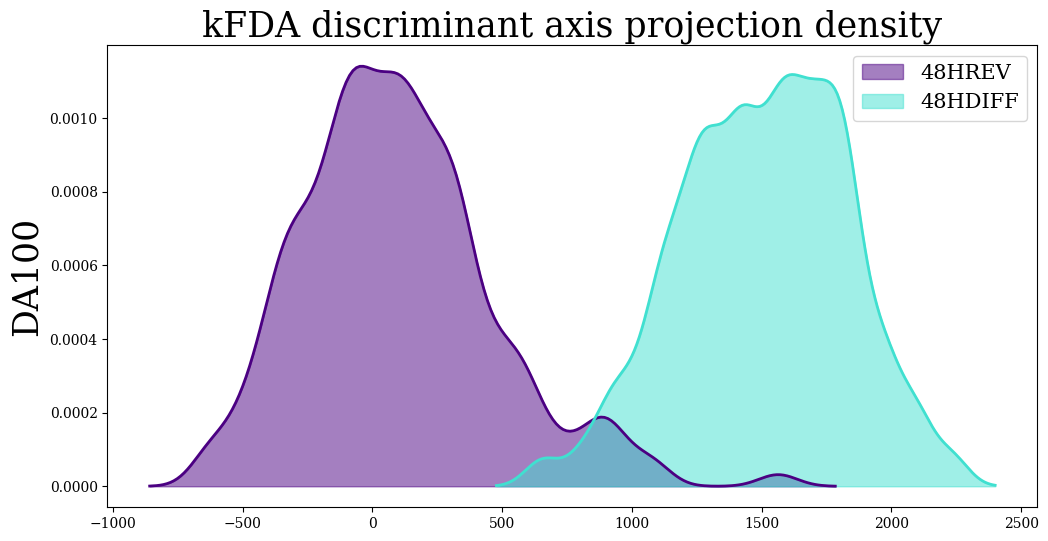

In [16]:
kt_1.plot_density()

Method `scatter_projection` allows to visualize projection scatters, with plot axes representing either kFDA discriminant axes or the contributions on each eigendirection for each sample:

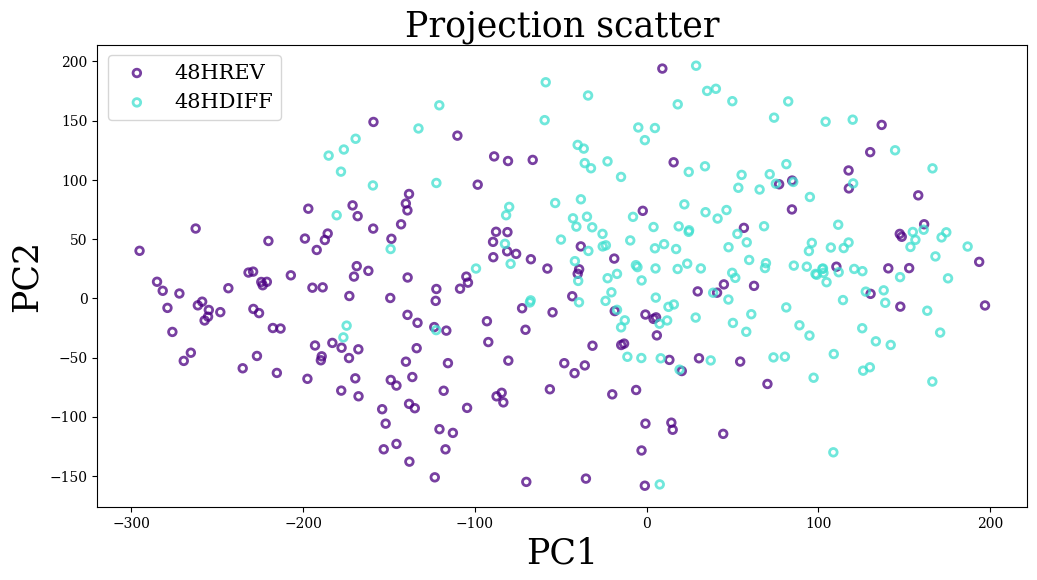

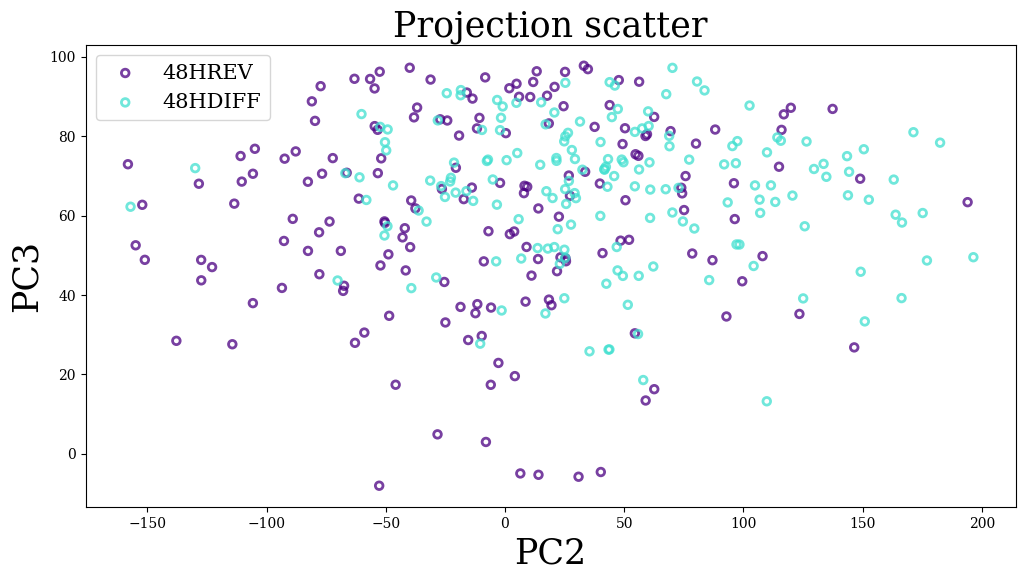

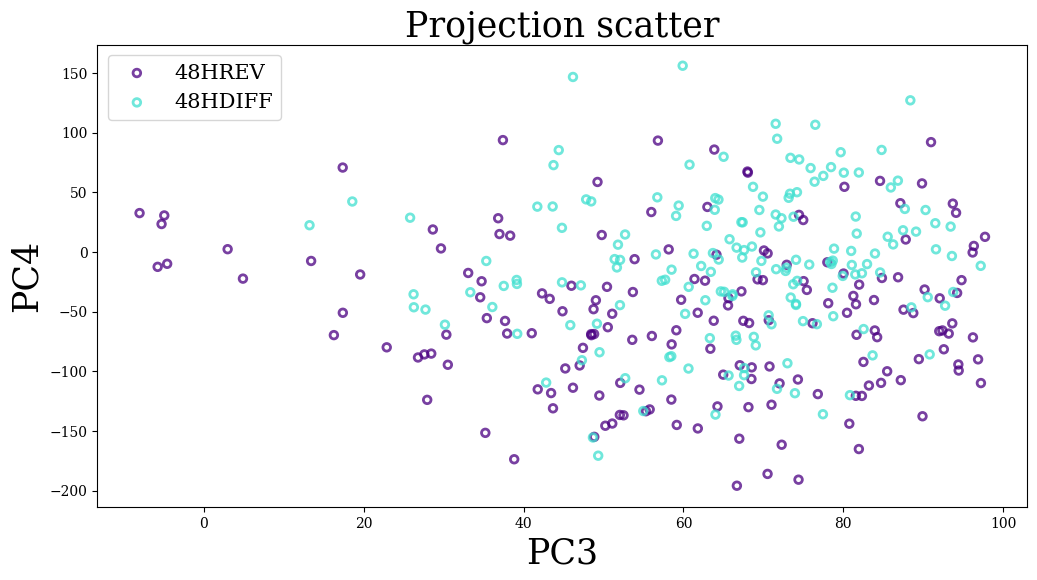

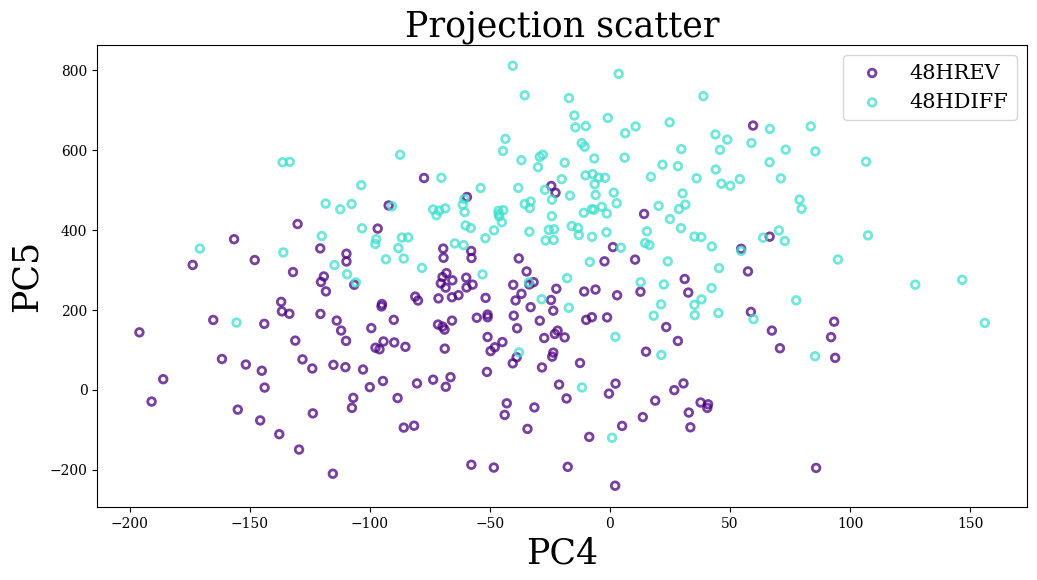

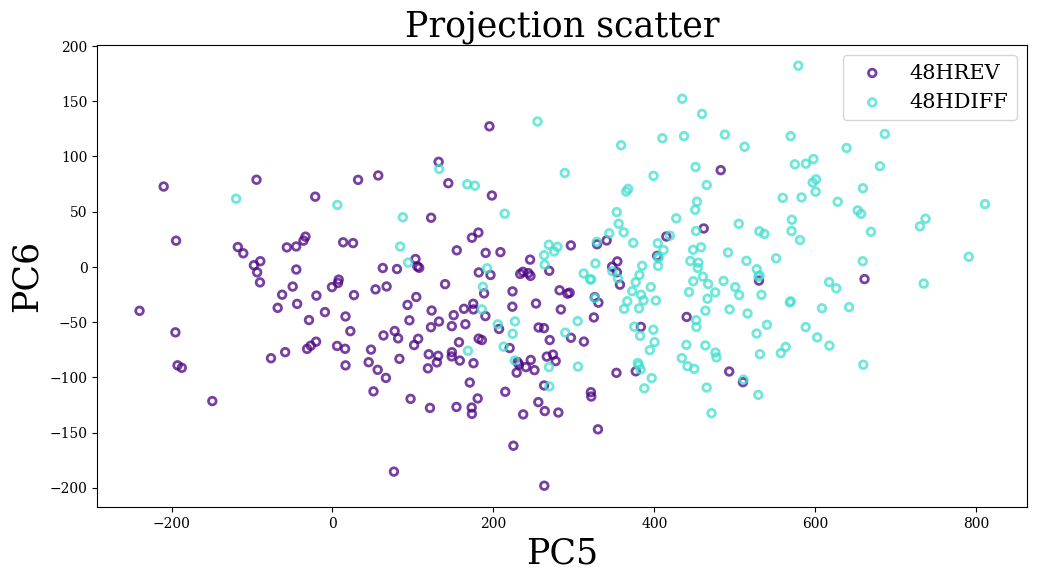

In [17]:
for t in range(1, 6):
    kt_1.scatter_projection(t_x=t, t_y=t+1, proj_xy=['kfda_contrib', 'kfda_contrib'])

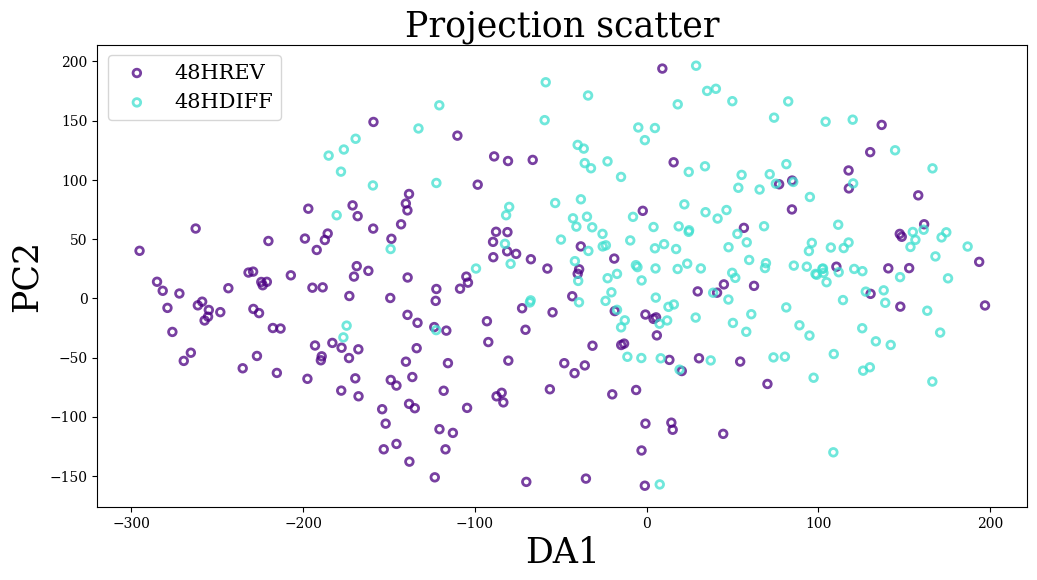

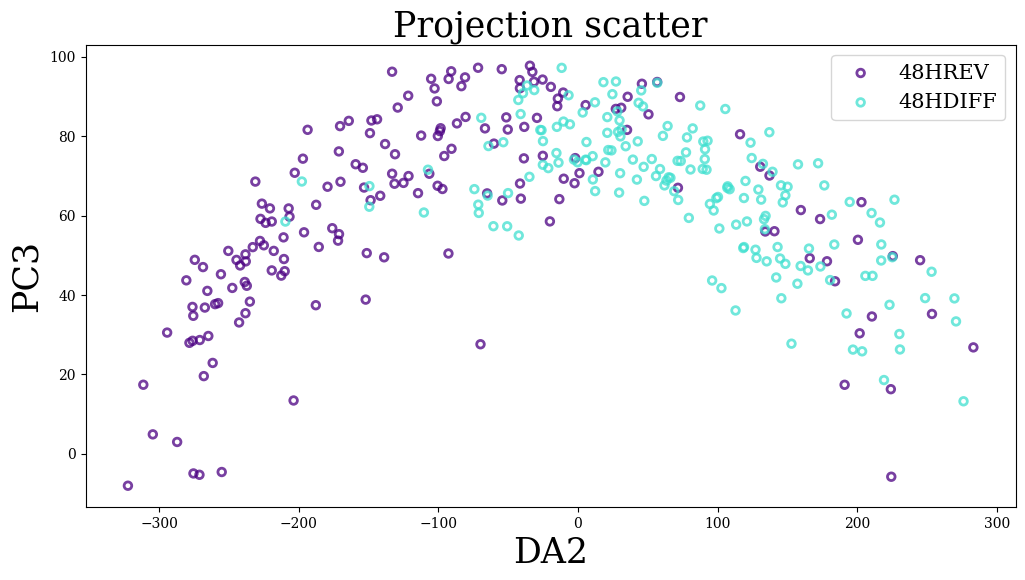

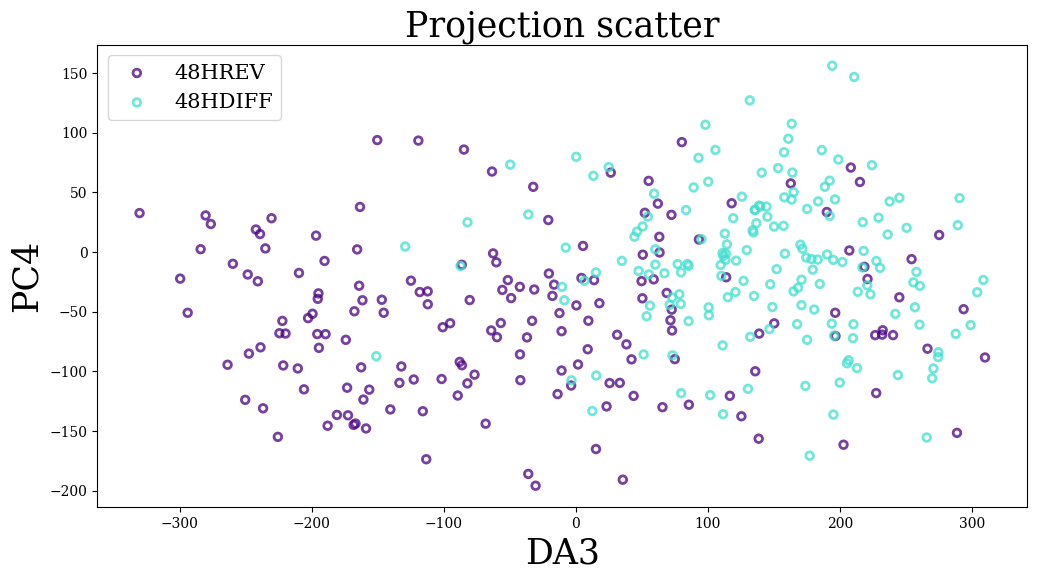

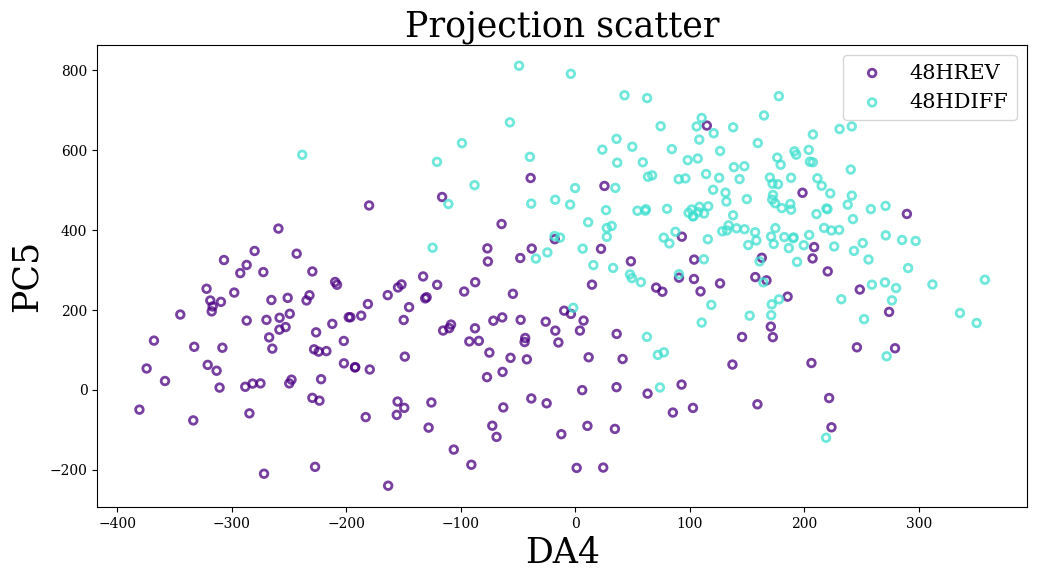

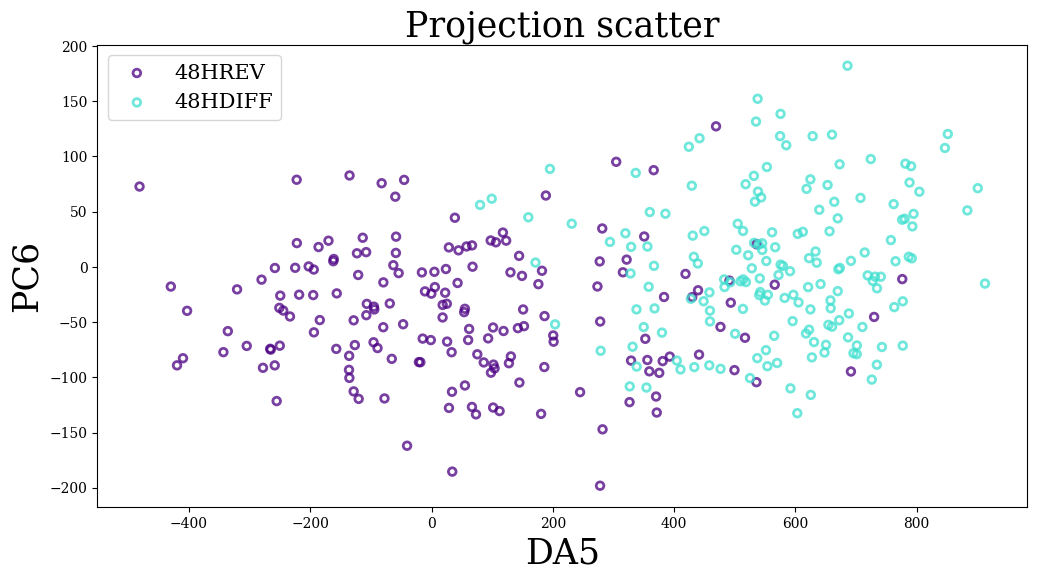

In [18]:
for t in range(1, 6):
    kt_1.scatter_projection(t_x=t, proj_xy=['kfda', 'kfda_contrib'])